In [1]:
import pandas as pd
pd.options.display.max_columns = 12
pd.options.display.max_rows = 24
import numpy as np

#remove warnings
import warnings

warnings.simplefilter('ignore')

# plots in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()




# Load data

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train=df_train[df_train['item']<5]

In [4]:
df_train

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
73035,2017-12-27,10,4,16
73036,2017-12-28,10,4,29
73037,2017-12-29,10,4,22
73038,2017-12-30,10,4,15


## Convert strings to dates

In [5]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.index = pd.DatetimeIndex(df_train['date'])
df_train.drop('date', axis=1, inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73040 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store   73040 non-null  int64
 1   item    73040 non-null  int64
 2   sales   73040 non-null  int64
dtypes: int64(3)
memory usage: 2.2 MB


## Sales for each storeitem

In [7]:
from itertools import product, starmap


def storeitems():
    return product(range(1,5), range(1,11))


def storeitems_column_names():
    return list(starmap(lambda i,s: f'item_{i}_store_{s}_sales', storeitems()))


def sales_by_storeitem(df):
    ret = pd.DataFrame(index=df.index.unique())
    for i, s in storeitems():
        ret[f'item_{i}_store_{s}_sales'] = df[(df['item'] == i) & (df['store'] == s)]['sales'].values
    return ret

In [8]:
df_train = sales_by_storeitem(df_train)

In [9]:
df_train['item_1_store_10_sales']

date
2013-01-01    14
2013-01-02    14
2013-01-03    16
2013-01-04    17
2013-01-05    12
              ..
2017-12-27    19
2017-12-28    12
2017-12-29    23
2017-12-30    26
2017-12-31    27
Name: item_1_store_10_sales, Length: 1826, dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   item_1_store_1_sales   1826 non-null   int64
 1   item_1_store_2_sales   1826 non-null   int64
 2   item_1_store_3_sales   1826 non-null   int64
 3   item_1_store_4_sales   1826 non-null   int64
 4   item_1_store_5_sales   1826 non-null   int64
 5   item_1_store_6_sales   1826 non-null   int64
 6   item_1_store_7_sales   1826 non-null   int64
 7   item_1_store_8_sales   1826 non-null   int64
 8   item_1_store_9_sales   1826 non-null   int64
 9   item_1_store_10_sales  1826 non-null   int64
 10  item_2_store_1_sales   1826 non-null   int64
 11  item_2_store_2_sales   1826 non-null   int64
 12  item_2_store_3_sales   1826 non-null   int64
 13  item_2_store_4_sales   1826 non-null   int64
 14  item_2_store_5_sales   1826 non-null   int64
 15  item_2_store_6_sales

## Test data
Loading test data will allow  us to have correct scaling on entire set, and perform all necessary transformation on combined data.

In [11]:
# load data
df_test = pd.read_csv('test.csv')
df_test.head()
df_test=df_test[df_test['item']<5]

In [12]:
# strings to dates
df_test['date'] = pd.to_datetime(df_test['date'])
df_test.index = pd.DatetimeIndex(df_test['date'])
df_test.drop('date', axis=1, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3600 entries, 2018-01-01 to 2018-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3600 non-null   int64
 1   store   3600 non-null   int64
 2   item    3600 non-null   int64
dtypes: int64(3)
memory usage: 112.5 KB


In [13]:
# mock sales to use same transformations as in df_train
df_test['sales'] = np.zeros(df_test.shape[0])
df_test = sales_by_storeitem(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2018-01-01 to 2018-03-31
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_1_store_1_sales   90 non-null     float64
 1   item_1_store_2_sales   90 non-null     float64
 2   item_1_store_3_sales   90 non-null     float64
 3   item_1_store_4_sales   90 non-null     float64
 4   item_1_store_5_sales   90 non-null     float64
 5   item_1_store_6_sales   90 non-null     float64
 6   item_1_store_7_sales   90 non-null     float64
 7   item_1_store_8_sales   90 non-null     float64
 8   item_1_store_9_sales   90 non-null     float64
 9   item_1_store_10_sales  90 non-null     float64
 10  item_2_store_1_sales   90 non-null     float64
 11  item_2_store_2_sales   90 non-null     float64
 12  item_2_store_3_sales   90 non-null     float64
 13  item_2_store_4_sales   90 non-null     float64
 14  item_2_store_5_sales   90 non-null     f

## Combine test and train datasets

In [14]:
df_test['is_test'] = np.repeat(True, df_test.shape[0])
df_train['is_test'] = np.repeat(False, df_train.shape[0])
df_total = pd.concat([df_train, df_test])
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1916 entries, 2013-01-01 to 2018-03-31
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_1_store_1_sales   1916 non-null   float64
 1   item_1_store_2_sales   1916 non-null   float64
 2   item_1_store_3_sales   1916 non-null   float64
 3   item_1_store_4_sales   1916 non-null   float64
 4   item_1_store_5_sales   1916 non-null   float64
 5   item_1_store_6_sales   1916 non-null   float64
 6   item_1_store_7_sales   1916 non-null   float64
 7   item_1_store_8_sales   1916 non-null   float64
 8   item_1_store_9_sales   1916 non-null   float64
 9   item_1_store_10_sales  1916 non-null   float64
 10  item_2_store_1_sales   1916 non-null   float64
 11  item_2_store_2_sales   1916 non-null   float64
 12  item_2_store_3_sales   1916 non-null   float64
 13  item_2_store_4_sales   1916 non-null   float64
 14  item_2_store_5_sales   1916 non-null  

##  encoding weekdays and months

In [15]:
weekday_df = pd.get_dummies(df_total.index.weekday, prefix='weekday')
weekday_df.index = df_total.index
weekday_df.head(10)

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
date,,,,,,,
2013-01-01,0,1,0,0,0,0,0
2013-01-02,0,0,1,0,0,0,0
2013-01-03,0,0,0,1,0,0,0
2013-01-04,0,0,0,0,1,0,0
2013-01-05,0,0,0,0,0,1,0
2013-01-06,0,0,0,0,0,0,1
2013-01-07,1,0,0,0,0,0,0
2013-01-08,0,1,0,0,0,0,0
2013-01-09,0,0,1,0,0,0,0


In [16]:
month_df = pd.get_dummies(df_total.index.month, prefix='month')
month_df.index =  df_total.index


In [17]:
df_total = pd.concat([weekday_df, month_df, df_total], axis=1)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1916 entries, 2013-01-01 to 2018-03-31
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   weekday_0              1916 non-null   uint8  
 1   weekday_1              1916 non-null   uint8  
 2   weekday_2              1916 non-null   uint8  
 3   weekday_3              1916 non-null   uint8  
 4   weekday_4              1916 non-null   uint8  
 5   weekday_5              1916 non-null   uint8  
 6   weekday_6              1916 non-null   uint8  
 7   month_1                1916 non-null   uint8  
 8   month_2                1916 non-null   uint8  
 9   month_3                1916 non-null   uint8  
 10  month_4                1916 non-null   uint8  
 11  month_5                1916 non-null   uint8  
 12  month_6                1916 non-null   uint8  
 13  month_7                1916 non-null   uint8  
 14  month_8                1916 non-null  

In [18]:
assert df_total.isna().any().any() == False

## Shift sales 


In [19]:
def shift_series(series, days):
    return series.transform(lambda x: x.shift(days))


def shift_series_in_df(df, series_names=[], days_delta=90):
    """
    Shift columns in df with names in series_names by days_delta.
    
    Negative days_delta will prepend future values to current date,
    positive days_delta wil prepend past values to current date.
    """
    ret = pd.DataFrame(index=df.index.copy())
    str_sgn = 'future' if np.sign(days_delta) < 0 else 'past'
    for sn in series_names:
        ret[f'{sn}_{str_sgn}_{np.abs(days_delta)}'] = shift_series(df[sn], days_delta)
    return ret

    
def stack_shifted_sales(df, days_delta=90):
    names = storeitems_column_names()
    dfs = [df.copy()]
    abs_range = range(1, days_delta+1) if days_delta > 0 else range(days_delta, 0)
    for day_offset in abs_range:
        print(day_offset)
        delta = -day_offset
        print(delta)
        shifted = shift_series_in_df(df, series_names=names, days_delta=delta)
        print(shifted.columns)
        dfs.append(shifted)
    return pd.concat(dfs, axis=1, copy=False)

In [20]:
df_total = stack_shifted_sales(df_total, days_delta=-1)

-1
1
Index(['item_1_store_1_sales_past_1', 'item_1_store_2_sales_past_1',
       'item_1_store_3_sales_past_1', 'item_1_store_4_sales_past_1',
       'item_1_store_5_sales_past_1', 'item_1_store_6_sales_past_1',
       'item_1_store_7_sales_past_1', 'item_1_store_8_sales_past_1',
       'item_1_store_9_sales_past_1', 'item_1_store_10_sales_past_1',
       'item_2_store_1_sales_past_1', 'item_2_store_2_sales_past_1',
       'item_2_store_3_sales_past_1', 'item_2_store_4_sales_past_1',
       'item_2_store_5_sales_past_1', 'item_2_store_6_sales_past_1',
       'item_2_store_7_sales_past_1', 'item_2_store_8_sales_past_1',
       'item_2_store_9_sales_past_1', 'item_2_store_10_sales_past_1',
       'item_3_store_1_sales_past_1', 'item_3_store_2_sales_past_1',
       'item_3_store_3_sales_past_1', 'item_3_store_4_sales_past_1',
       'item_3_store_5_sales_past_1', 'item_3_store_6_sales_past_1',
       'item_3_store_7_sales_past_1', 'item_3_store_8_sales_past_1',
       'item_3_store_9_sale

In [21]:
df_total.columns

Index(['weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'item_1_store_1_sales', 'item_1_store_2_sales',
       'item_1_store_3_sales', 'item_1_store_4_sales', 'item_1_store_5_sales',
       'item_1_store_6_sales', 'item_1_store_7_sales', 'item_1_store_8_sales',
       'item_1_store_9_sales', 'item_1_store_10_sales', 'item_2_store_1_sales',
       'item_2_store_2_sales', 'item_2_store_3_sales', 'item_2_store_4_sales',
       'item_2_store_5_sales', 'item_2_store_6_sales', 'item_2_store_7_sales',
       'item_2_store_8_sales', 'item_2_store_9_sales', 'item_2_store_10_sales',
       'item_3_store_1_sales', 'item_3_store_2_sales', 'item_3_store_3_sales',
       'item_3_store_4_sales', 'item_3_store_5_sales', 'item_3_store_6_sales',
       'item_3_store_7_sales', 'item_3_store_8_sales', 'item_3_s

In [22]:
df_total = df_total.dropna()  # this should ONLY remove 1st row
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1915 entries, 2013-01-02 to 2018-03-31
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   weekday_0                     1915 non-null   uint8  
 1   weekday_1                     1915 non-null   uint8  
 2   weekday_2                     1915 non-null   uint8  
 3   weekday_3                     1915 non-null   uint8  
 4   weekday_4                     1915 non-null   uint8  
 5   weekday_5                     1915 non-null   uint8  
 6   weekday_6                     1915 non-null   uint8  
 7   month_1                       1915 non-null   uint8  
 8   month_2                       1915 non-null   uint8  
 9   month_3                       1915 non-null   uint8  
 10  month_4                       1915 non-null   uint8  
 11  month_5                       1915 non-null   uint8  
 12  month_6                       1915 non-null

In [23]:

sales_cols = [col for col in df_total.columns if '_sales' in col and '_sales_' not in col]
stacked_sales_cols = [col for col in df_total.columns if '_sales_' in col]
other_cols = [col for col in df_total.columns if col not in set(sales_cols) and col not in set(stacked_sales_cols)]

sales_cols = sorted(sales_cols)
stacked_sales_cols = sorted(stacked_sales_cols)

new_cols = other_cols + stacked_sales_cols + sales_cols

In [24]:
df_total = df_total.reindex(columns=new_cols)

In [25]:
df_total

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,item_4_store_4_sales,item_4_store_5_sales,item_4_store_6_sales,item_4_store_7_sales,item_4_store_8_sales,item_4_store_9_sales
date,,,,,,,,,,,,,
2013-01-02,0,0,1,0,0,0,...,16.0,5.0,7.0,8.0,10.0,15.0
2013-01-03,0,0,0,1,0,0,...,12.0,8.0,17.0,9.0,16.0,7.0
2013-01-04,0,0,0,0,1,0,...,19.0,7.0,10.0,2.0,13.0,19.0
2013-01-05,0,0,0,0,0,1,...,13.0,7.0,14.0,15.0,18.0,16.0
2013-01-06,0,0,0,0,0,0,...,10.0,12.0,14.0,7.0,20.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-28,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-29,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_total.tail()

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,item_4_store_4_sales,item_4_store_5_sales,item_4_store_6_sales,item_4_store_7_sales,item_4_store_8_sales,item_4_store_9_sales
date,,,,,,,,,,,,,
2018-03-27,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-28,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-29,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-30,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-31,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_total.describe()

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,item_4_store_4_sales,item_4_store_5_sales,item_4_store_6_sales,item_4_store_7_sales,item_4_store_8_sales,item_4_store_9_sales
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,...,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000
mean,0.142559,0.142559,0.143081,0.143081,0.143081,0.143081,...,22.006789,15.994778,15.971802,14.641253,25.689295,22.068930
std,0.349714,0.349714,0.350247,0.350247,0.350247,0.350247,...,8.746963,6.597946,6.725724,6.130100,9.926536,8.883752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,12.000000,12.000000,11.000000,20.000000,17.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,16.000000,16.000000,15.000000,26.000000,22.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.000000,20.000000,20.000000,19.000000,32.000000,28.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,40.000000,39.000000,34.000000,56.000000,51.000000


In [28]:
assert df_total.isna().any().any() == False

## Scaling
With combined datasets and shifted sales, we can now correctly min-max scale all data.

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [30]:
cols_to_scale = [col for col in df_total.columns if 'weekday' not in col and 'month' not in col]

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_total[cols_to_scale])
df_total[cols_to_scale] = scaler.transform(df_total[cols_to_scale])
df_total.head()

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,item_4_store_4_sales,item_4_store_5_sales,item_4_store_6_sales,item_4_store_7_sales,item_4_store_8_sales,item_4_store_9_sales
date,,,,,,,,,,,,,
2013-01-02,0,0,1,0,0,0,...,0.296296,0.125,0.179487,0.235294,0.178571,0.294118
2013-01-03,0,0,0,1,0,0,...,0.222222,0.200,0.435897,0.264706,0.285714,0.137255
2013-01-04,0,0,0,0,1,0,...,0.351852,0.175,0.256410,0.058824,0.232143,0.372549
2013-01-05,0,0,0,0,0,1,...,0.240741,0.175,0.358974,0.441176,0.321429,0.313725
2013-01-06,0,0,0,0,0,0,...,0.185185,0.300,0.358974,0.205882,0.357143,0.235294


In [32]:
df_total.describe()

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,item_4_store_4_sales,item_4_store_5_sales,item_4_store_6_sales,item_4_store_7_sales,item_4_store_8_sales,item_4_store_9_sales
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,...,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000
mean,0.142559,0.142559,0.143081,0.143081,0.143081,0.143081,...,0.407533,0.399869,0.409533,0.430625,0.458737,0.432724
std,0.349714,0.349714,0.350247,0.350247,0.350247,0.350247,...,0.161981,0.164949,0.172454,0.180297,0.177260,0.174191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.314815,0.300000,0.307692,0.323529,0.357143,0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.407407,0.400000,0.410256,0.441176,0.464286,0.431373
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.518519,0.500000,0.512821,0.558824,0.571429,0.549020
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split back train and test set


In [33]:
df_train = df_total[df_total['is_test'] == False].drop('is_test', axis=1)
df_test = df_total[df_total['is_test'] == True].drop('is_test', axis=1)

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2013-01-02 to 2017-12-31
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   weekday_0                     1825 non-null   uint8  
 1   weekday_1                     1825 non-null   uint8  
 2   weekday_2                     1825 non-null   uint8  
 3   weekday_3                     1825 non-null   uint8  
 4   weekday_4                     1825 non-null   uint8  
 5   weekday_5                     1825 non-null   uint8  
 6   weekday_6                     1825 non-null   uint8  
 7   month_1                       1825 non-null   uint8  
 8   month_2                       1825 non-null   uint8  
 9   month_3                       1825 non-null   uint8  
 10  month_4                       1825 non-null   uint8  
 11  month_5                       1825 non-null   uint8  
 12  month_6                       1825 non-null 

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2018-01-01 to 2018-03-31
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   weekday_0                     90 non-null     uint8  
 1   weekday_1                     90 non-null     uint8  
 2   weekday_2                     90 non-null     uint8  
 3   weekday_3                     90 non-null     uint8  
 4   weekday_4                     90 non-null     uint8  
 5   weekday_5                     90 non-null     uint8  
 6   weekday_6                     90 non-null     uint8  
 7   month_1                       90 non-null     uint8  
 8   month_2                       90 non-null     uint8  
 9   month_3                       90 non-null     uint8  
 10  month_4                       90 non-null     uint8  
 11  month_5                       90 non-null     uint8  
 12  month_6                       90 non-null     

## Split data

In [36]:
X_cols_stacked = [col for col in df_train.columns if '_past_' in col]
X_cols_caldata = [col for col in df_train.columns if 'weekday_' in col or 'month_' in col]
X_cols = X_cols_stacked + X_cols_caldata

X = df_train[X_cols]

In [37]:
X_colset = set(X_cols)
y_cols = [col for col in df_train.columns if col not in X_colset]

y = df_train[y_cols]

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2013-01-02 to 2017-12-31
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   item_1_store_10_sales_past_1  1825 non-null   float64
 1   item_1_store_1_sales_past_1   1825 non-null   float64
 2   item_1_store_2_sales_past_1   1825 non-null   float64
 3   item_1_store_3_sales_past_1   1825 non-null   float64
 4   item_1_store_4_sales_past_1   1825 non-null   float64
 5   item_1_store_5_sales_past_1   1825 non-null   float64
 6   item_1_store_6_sales_past_1   1825 non-null   float64
 7   item_1_store_7_sales_past_1   1825 non-null   float64
 8   item_1_store_8_sales_past_1   1825 non-null   float64
 9   item_1_store_9_sales_past_1   1825 non-null   float64
 10  item_2_store_10_sales_past_1  1825 non-null   float64
 11  item_2_store_1_sales_past_1   1825 non-null   float64
 12  item_2_store_2_sales_past_1   1825 non-null 

In [39]:
X

,item_1_store_10_sales_past_1,item_1_store_1_sales_past_1,item_1_store_2_sales_past_1,item_1_store_3_sales_past_1,item_1_store_4_sales_past_1,item_1_store_5_sales_past_1,...,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,
2013-01-02,0.259259,0.26,0.206897,0.365385,0.185185,0.275,...,0,0,0,0,0,0
2013-01-03,0.259259,0.22,0.275862,0.153846,0.222222,0.225,...,0,0,0,0,0,0
2013-01-04,0.296296,0.28,0.275862,0.192308,0.148148,0.300,...,0,0,0,0,0,0
2013-01-05,0.314815,0.26,0.344828,0.288462,0.277778,0.200,...,0,0,0,0,0,0
2013-01-06,0.222222,0.20,0.275862,0.423077,0.351852,0.325,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,0.296296,0.32,0.431034,0.307692,0.333333,0.300,...,0,0,0,0,0,1
2017-12-28,0.351852,0.28,0.327586,0.307692,0.277778,0.375,...,0,0,0,0,0,1
2017-12-29,0.222222,0.38,0.362069,0.326923,0.481481,0.325,...,0,0,0,0,0,1


In [40]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2013-01-02 to 2017-12-31
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_1_store_10_sales  1825 non-null   float64
 1   item_1_store_1_sales   1825 non-null   float64
 2   item_1_store_2_sales   1825 non-null   float64
 3   item_1_store_3_sales   1825 non-null   float64
 4   item_1_store_4_sales   1825 non-null   float64
 5   item_1_store_5_sales   1825 non-null   float64
 6   item_1_store_6_sales   1825 non-null   float64
 7   item_1_store_7_sales   1825 non-null   float64
 8   item_1_store_8_sales   1825 non-null   float64
 9   item_1_store_9_sales   1825 non-null   float64
 10  item_2_store_10_sales  1825 non-null   float64
 11  item_2_store_1_sales   1825 non-null   float64
 12  item_2_store_2_sales   1825 non-null   float64
 13  item_2_store_3_sales   1825 non-null   float64
 14  item_2_store_4_sales   1825 non-null  

## Shape for  LSTM

In [41]:
#split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=False)

In [42]:
# reshape inputs 
X_train_vals = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid_vals = X_valid.values.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

## Training LSTM
Using features for all storeitems (stacked sales from previous day) to predict sales for one storeitem (sales for current day).

500 features, 1826 samples

In [43]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *

In [44]:
# model alternative 2 - double with conv1ds TODO
# https://arxiv.org/pdf/1709.05206.pdf
def build_model():
    inputs = Input(shape=(X_train_vals.shape[1], X_train_vals.shape[2]))
    # top pipeline
    top_lstm = LSTM(40, return_sequences=True)(inputs)
    top_dense = Dense(40, activation='relu')(top_lstm)
    # bottom pipeline
    bottom_dense = Dense(40)(inputs)
    bottom_conv1 = Conv1D(
        40, 
        kernel_size=1,
        input_shape=(X_train_vals.shape[1], X_train_vals.shape[2])
    )(bottom_dense)
    bottom_conv2 = Conv1D(
        80,
        kernel_size=10,
        padding='same',
        activation='relu'
    )(bottom_conv1)
    bottom_conv3 = Conv1D(
        40,
        kernel_size=10,
        padding='same',
        activation='relu'
    )(bottom_conv2)
    bottom_pooling = AvgPool1D(
        pool_size=10, 
        padding='same'
    )(bottom_conv3)
    final_concat = Concatenate()([top_dense, bottom_pooling])
    final_lstm = LSTM(80, dropout=0.2)(final_concat)
    final_dense = Dense(40)(final_lstm)
    model = Model(inputs=inputs, outputs=final_dense)
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mape'])
    return model

model = build_model()

In [44]:
# model alternative 2 - double with conv1ds TODO
# https://arxiv.org/pdf/1709.05206.pdf
def build_model1():
    inputs = Input(shape=(X_train_vals.shape[1], X_train_vals.shape[2]))
    # top pipeline
    top_lstm = LSTM(40, return_sequences=True)(inputs)
    final_lstm = LSTM(80, dropout=0.2)(top_lstm)
    final_dense = Dense(40)(final_lstm)
    model = Model(inputs=inputs, outputs=final_dense)
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mape'])
    return model

model1 = build_model1()

In [45]:
#train model
history = model1.fit(
    X_train_vals, 
    y_train.values, 
    epochs=130, 
    batch_size=70,
    validation_data=(X_valid_vals, y_valid.values),
    verbose=2,
    shuffle=False
)

Epoch 1/130
21/21 - 7s - loss: 0.3938 - mape: 275.5949 - val_loss: 0.3438 - val_mape: 63.2748
Epoch 2/130
21/21 - 0s - loss: 0.1547 - mape: 4703.7842 - val_loss: 0.0980 - val_mape: 21.6623
Epoch 3/130
21/21 - 0s - loss: 0.0959 - mape: 4471.9336 - val_loss: 0.0940 - val_mape: 21.3219
Epoch 4/130
21/21 - 0s - loss: 0.0922 - mape: 4745.3901 - val_loss: 0.0880 - val_mape: 19.6502
Epoch 5/130
21/21 - 0s - loss: 0.0873 - mape: 4632.5889 - val_loss: 0.0845 - val_mape: 18.7736
Epoch 6/130
21/21 - 0s - loss: 0.0832 - mape: 3862.8511 - val_loss: 0.0818 - val_mape: 18.2215
Epoch 7/130
21/21 - 0s - loss: 0.0812 - mape: 4428.3252 - val_loss: 0.0788 - val_mape: 17.3800
Epoch 8/130
21/21 - 0s - loss: 0.0781 - mape: 3991.7935 - val_loss: 0.0757 - val_mape: 16.2824
Epoch 9/130
21/21 - 0s - loss: 0.0763 - mape: 3374.5273 - val_loss: 0.0743 - val_mape: 15.8125
Epoch 10/130
21/21 - 0s - loss: 0.0763 - mape: 3774.1277 - val_loss: 0.0739 - val_mape: 15.5623
Epoch 11/130
21/21 - 0s - loss: 0.0747 - mape: 398

Epoch 87/130
21/21 - 0s - loss: 0.0723 - mape: 4268.2500 - val_loss: 0.0731 - val_mape: 15.8456
Epoch 88/130
21/21 - 0s - loss: 0.0722 - mape: 4239.1304 - val_loss: 0.0732 - val_mape: 15.8539
Epoch 89/130
21/21 - 0s - loss: 0.0720 - mape: 4056.2664 - val_loss: 0.0733 - val_mape: 15.9140
Epoch 90/130
21/21 - 0s - loss: 0.0719 - mape: 4265.0107 - val_loss: 0.0734 - val_mape: 15.9338
Epoch 91/130
21/21 - 0s - loss: 0.0722 - mape: 4362.6646 - val_loss: 0.0734 - val_mape: 15.9400
Epoch 92/130
21/21 - 0s - loss: 0.0720 - mape: 4262.8291 - val_loss: 0.0729 - val_mape: 15.7530
Epoch 93/130
21/21 - 0s - loss: 0.0715 - mape: 4087.1240 - val_loss: 0.0732 - val_mape: 15.8887
Epoch 94/130
21/21 - 0s - loss: 0.0720 - mape: 4311.6055 - val_loss: 0.0731 - val_mape: 15.8205
Epoch 95/130
21/21 - 0s - loss: 0.0715 - mape: 4299.7314 - val_loss: 0.0731 - val_mape: 15.8088
Epoch 96/130
21/21 - 0s - loss: 0.0719 - mape: 4153.2222 - val_loss: 0.0732 - val_mape: 15.8776
Epoch 97/130
21/21 - 0s - loss: 0.0721 -

In [46]:
#load model
import tensorflow as tf
model1 =tf.keras.models.load_model('model_lst.h5')

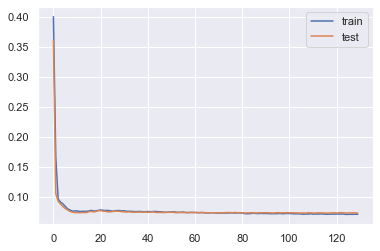

In [48]:
# plot history loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [46]:
from tensorflow.keras.utils import plot_model

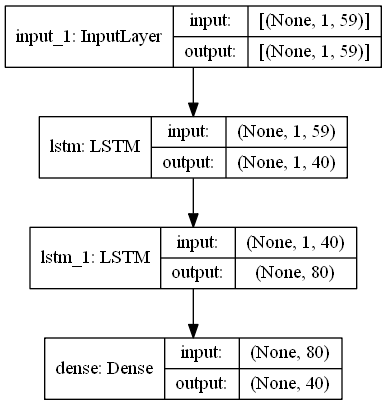

In [47]:
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

## Calculate SMAPE for the modelSMAPE is calculated on a validation set for the model


In [48]:
X_valid.shape

(365, 59)

In [49]:
y_valid.shape

(365, 40)

In [50]:
def model_eval(model, X_test, y_test, log_all=False):
   
    # prepare data
    sales_x_cols = [col for col in X_test.columns if 'sales' in col]
    sales_x_idxs = [X_test.columns.get_loc(col) for col in sales_x_cols]
    sales_y_cols = [col for col in y_test.columns if 'sales' in col]
    sales_y_idxs = [y_test.columns.get_loc(col) for col in sales_y_cols]
    n_samples = y_test.shape[0]
    y_pred = np.zeros(y_test.shape)
    # iterate
    x_next = X_test.iloc[0].values
    for i in range(0, n_samples):
        if log_all:
            print('[x]', x_next)
        x_arr = np.array([x_next])
        x_arr = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])
        y_pred[i] = model.predict(x_arr)[0]
        try:
            x_next = X_test.iloc[i+1].values
            x_next[sales_x_idxs] = y_pred[i][sales_y_idxs]
        except IndexError:
            pass  
    return y_pred, y_test.values

def vector_smape(y_pred, y_real):
    nom = np.abs(y_pred-y_real)
    denom = (np.abs(y_pred) + np.abs(y_real)) / 2
    results = nom / denom
    return 100*np.mean(results)  

In [51]:
X_valid, y_valid = X_valid.head(90), y_valid.head(90)

Prepare data for calculating SMAPE scores:

In [52]:
y_pred, y_real = model_eval(model1, X_valid, y_valid)

In [53]:
def unscale(y_arr, scaler, template_df, toint=False):
    #inverse scaling
    tmp = template_df.copy()
    tmp[y_cols] = pd.DataFrame(y_arr, index=tmp.index)
    tmp[cols_to_scale] = scaler.inverse_transform(tmp[cols_to_scale])
    if toint:
        return tmp[y_cols].astype(int)
    return tmp[y_cols]

In [54]:
template_df = pd.concat([X_valid, y_valid], axis=1)
template_df['is_test'] = np.repeat(True, template_df.shape[0])

pred = unscale(y_pred, scaler, template_df, toint=True)
real = unscale(y_real, scaler, template_df, toint=True)

In [55]:
pred

,item_1_store_10_sales,item_1_store_1_sales,item_1_store_2_sales,item_1_store_3_sales,item_1_store_4_sales,item_1_store_5_sales,...,item_4_store_4_sales,item_4_store_5_sales,item_4_store_6_sales,item_4_store_7_sales,item_4_store_8_sales,item_4_store_9_sales
date,,,,,,,,,,,,,
2017-01-01,26,21,29,26,24,17,...,24,17,17,16,28,24
2017-01-02,17,14,20,17,16,12,...,16,12,11,11,19,16
2017-01-03,21,17,24,20,19,14,...,19,14,14,13,23,19
2017-01-04,21,17,24,21,19,14,...,19,14,14,13,23,19
2017-01-05,23,18,26,23,21,15,...,21,15,15,14,25,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,23,19,27,23,22,15,...,22,16,16,15,26,22
2017-03-28,27,22,31,27,25,18,...,25,18,18,17,29,25
2017-03-29,27,23,31,27,25,18,...,25,18,18,17,30,25


In [56]:
vector_smape(pred,real)

item_1_store_10_sales    28.934917
item_1_store_1_sales     30.671085
item_1_store_2_sales     25.904047
item_1_store_3_sales     22.235158
item_1_store_4_sales     27.841338
                           ...    
item_4_store_5_sales     31.828478
item_4_store_6_sales     29.805696
item_4_store_7_sales     30.133130
item_4_store_8_sales     30.207784
item_4_store_9_sales     30.893419
Length: 40, dtype: float64

In [57]:
smapes = [vector_smape(pred[col], real[col]) for col in pred.columns]

<AxesSubplot:ylabel='Density'>

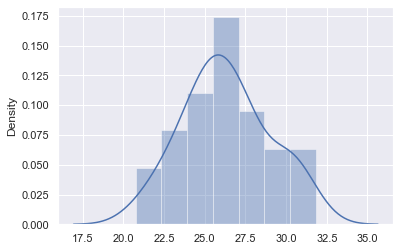

In [58]:
sns.distplot(smapes)

In [59]:
from scipy.stats import describe
describe(smapes)

DescribeResult(nobs=40, minmax=(20.75272128791235, 31.828477683359086), mean=26.319415970631887, variance=7.073549289474419, skewness=0.15626539842702128, kurtosis=-0.5343733195728428)

In [60]:
store, item = np.random.randint(1,11), np.random.randint(1,4)
random_storeitem_col = f'item_{item}_store_{store}_sales'

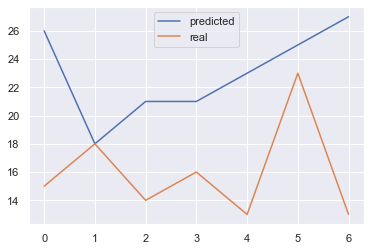

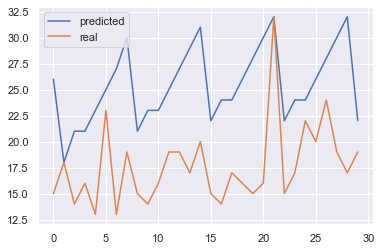

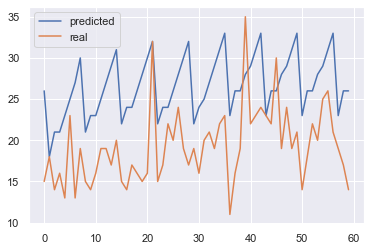

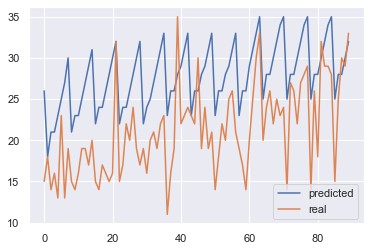

In [61]:
plot_lengths = [7, 30, 60, 365]

for pl in plot_lengths:
    plt.plot(pred[random_storeitem_col].values[:pl], label='predicted')
    plt.plot(real[random_storeitem_col].values[:pl], label='real')
    plt.legend()
    plt.show()


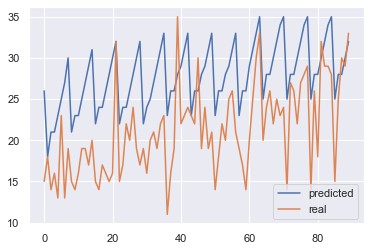

In [62]:
plt.plot(pred[random_storeitem_col].values, label='predicted')
plt.plot(real[random_storeitem_col].values, label='real')
plt.legend()
plt.show()
